# <h1><center>Spatial Operations</center></h1>

## 4 - Nearest Neighbour Analysis

Finding the nearest neighbour of an object to another is a common spatial data analysis task. For example, determining the closest service point to your home is an optimisation problem that requires performing Nearest Neighbour Analysis with spatial data.

### Learning Objectives:

1. Understand Unary Union
2. Perform Neirest Neighbour of Points.


In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import folium 
from shapely.ops import nearest_points
from shapely.geometry import LineString

In [2]:
stations = pd.read_csv("data/bike_data/stations.csv")
stations.head()

,id,name,dpcapacity,xcoord,ycoord
0,5,State St & Harrison St,19,-87.627739,41.873958
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500
2,14,Morgan St & 18th St,15,-87.651073,41.858086
3,15,Racine Ave & 19th St,15,-87.656471,41.856453
4,16,Wood St & North Ave,15,-87.672516,41.910329


In [3]:
points = pd.read_csv("data/bike_data/points.csv")
points.head()

,id,xcoord,ycoord
0,1,-87.675992,41.969792
1,2,-87.676702,41.956395
2,3,-87.601501,41.805379
3,4,-87.616656,41.858263
4,5,-87.706869,41.963010


In [6]:
def create_gdf(df, x="xcoord", y="ycoord"):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[x], df[y]), crs= "epsg:4326")


stations_gdf = create_gdf(stations)
points_gdf = create_gdf(points)

In [7]:
stations_gdf.head()

,id,name,dpcapacity,xcoord,ycoord,geometry
0,5,State St & Harrison St,19,-87.627739,41.873958,POINT (-87.62774 41.87396)
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500,POINT (-87.65268 41.93250)
2,14,Morgan St & 18th St,15,-87.651073,41.858086,POINT (-87.65107 41.85809)
3,15,Racine Ave & 19th St,15,-87.656471,41.856453,POINT (-87.65647 41.85645)
4,16,Wood St & North Ave,15,-87.672516,41.910329,POINT (-87.67252 41.91033)


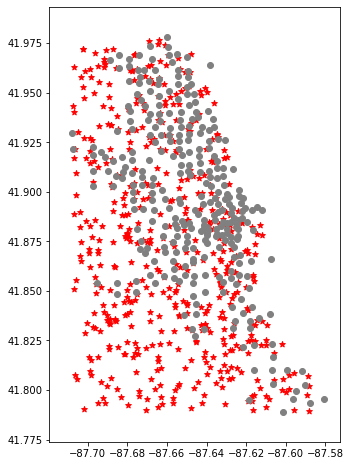

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
points_gdf.plot(ax=ax, color="Red", marker= "*")
stations_gdf.plot(ax=ax, color="grey")

plt.show()

In [12]:
def calculate_nearest(row, destination, val, col="geometry"):
    dest_unary = destination["geometry"].unary_union
    nearest_geom = nearest_points(row[col], dest_unary)
    match_geom = destination.loc[destination.geometry == nearest_geom[1]]
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [13]:
points_gdf["nearest_geom"] = points_gdf.apply(calculate_nearest, destination=stations_gdf, val="geometry", axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927)
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835)
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611)
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555)


In [14]:

points_gdf["nearest_station"] = points_gdf.apply(calculate_nearest, destination=stations_gdf, val="name", axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave


In [15]:
points_gdf['line'] = points_gdf.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)

points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station,line
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave,LINESTRING (-87.67599211881929 41.969792417635...
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave,LINESTRING (-87.6767023973826 41.9563952204838...
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St,"LINESTRING (-87.601501134953 41.8053785205414,..."
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St,LINESTRING (-87.61665568206151 41.858262512299...
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave,LINESTRING (-87.7068694739994 41.9630104417897...


In [16]:
points_gdf.geometry


0      POINT (-87.67599 41.96979)
1      POINT (-87.67670 41.95640)
2      POINT (-87.60150 41.80538)
3      POINT (-87.61666 41.85826)
4      POINT (-87.70687 41.96301)
                  ...            
493    POINT (-87.66327 41.92158)
494    POINT (-87.68038 41.84712)
495    POINT (-87.65710 41.92564)
496    POINT (-87.66918 41.97626)
497    POINT (-87.66973 41.89712)
Name: geometry, Length: 498, dtype: geometry

In [17]:
line_gdf = points_gdf[["id", "nearest_station", "line"]].set_geometry('line')

In [18]:
line_gdf.geometry

0      LINESTRING (-87.67599 41.96979, -87.67424 41.9...
1      LINESTRING (-87.67670 41.95640, -87.67926 41.9...
2      LINESTRING (-87.60150 41.80538, -87.59938 41.8...
3      LINESTRING (-87.61666 41.85826, -87.61941 41.8...
4      LINESTRING (-87.70687 41.96301, -87.68849 41.9...
                             ...                        
493    LINESTRING (-87.66327 41.92158, -87.66309 41.9...
494    LINESTRING (-87.68038 41.84712, -87.68511 41.8...
495    LINESTRING (-87.65710 41.92564, -87.65840 41.9...
496    LINESTRING (-87.66918 41.97626, -87.66837 41.9...
497    LINESTRING (-87.66973 41.89712, -87.66775 41.8...
Name: line, Length: 498, dtype: geometry

In [ ]:
line_gdf.crs =  "epsg:4326"
points_gdf.drop(["nearest_geom", "line"], axis=1, inplace=True)
points_gdf.head()

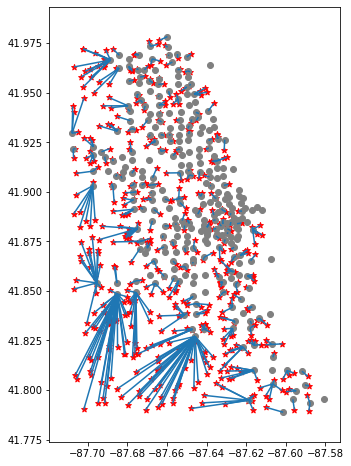

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
points_gdf.plot(ax=ax, color="Red", marker= "*")
stations_gdf.plot(ax=ax, color="grey")
line_gdf.plot(ax=ax)

plt.show()

In [23]:
line_gdf.crs =  "epsg:4326"
m = folium.Map([41.805379, -87.601501],
               zoom_start = 12, 
               tiles="CartoDb dark_matter")
locs_stations = zip(stations_gdf.ycoord, stations_gdf.xcoord)
locs_points = zip(points_gdf.ycoord, points_gdf.xcoord)
for location in locs_stations:
    folium.CircleMarker(location=location, color="red", radius=8).add_to(m)
for location in locs_points:
    folium.CircleMarker(location=location, color="white", radius=4).add_to(m)
folium.GeoJson(line_gdf).add_to(m)
m.save("map2.html")
m

**Recap**
* `.unary_union` --> Return a geometry containing the union of all geometries in the GeoSeries. 
* `.nearest_points` --> can calculate nearest geometries. 
* `.set_geometry` --> set the geometry of the geodataframe. 
